 # Specific Objective
The primary objective of this project is to develop a data-driven solution that empowers homeowners with actionable insights into eg the potential impact of home renovations on the estimated value of their properties. By leveraging real estate data and machine learning algorithms, the aim is to create a predictive model that can recommend specific renovations likely to result in the highest return on investment. In this data set we will:

1) Explore the data set and handle any missing values and Non-Numeric Data.

2) Conduct regression modeling.

3) Identifying the limitations and/or uncertainty present in the analysis.

4) Provide recommendations that can be used by the stakeholders.

# Importing necessary libraries

In [100]:
# Import necessary libraries
import pandas as pd# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats 
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# load the dataset

In [4]:
#loading the dataset.This project uses the King County House Sales dataset.
df = pd.read_csv(r"C:\Users\Caro\Downloads\kc_house_data.csv")

# explore the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [7]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [8]:
df.shape

(21597, 21)

In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# DATA CLEANING
1.Handling Missing Values

2.Correcting Data Types

3.Handling duplicates

4.Handling Outliers

5.Ensure consistency and accuracy across columns.

6.Display final dataset

# COPY

In [10]:
#Create a deep copy of the DataFrame
df_copy= df.copy(deep=True)
df_copy

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [11]:
# Detect missing values. 
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [12]:
#handling the missing values
# Impute columns with mode
df['waterfront'].fillna(df['waterfront'].mode()[0], inplace=True)
df['view'].fillna(df['view'].mode()[0], inplace=True)

# Impute 'yr_renovated' column with 0
df['yr_renovated'].fillna(0, inplace=True)


In [45]:
#confirm if we still have missing values
df.isna().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
#checking the datatypes of my columns
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [14]:
# Changing the data type from float to integer. 
df['bathrooms'] = df['bathrooms'].astype('int64')
df['floors'] = df['floors'].astype('int64')
df['bedrooms'] = df['bedrooms'].astype('int64')

# check the resulting dataframes
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1,1180,5650,1,NO,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2,2570,7242,2,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1,770,10000,1,NO,NONE,...,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3,1960,5000,1,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2,1680,8080,1,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [15]:
# Initialize LabelEncoder to  convert categorical variables
label_encoder = LabelEncoder()

# Apply label encoding to the column
df['grade_encoded'] = label_encoder.fit_transform(df['grade'])
df['date_encoded'] = label_encoder.fit_transform(df['date'])
df['condition_encoded'] = label_encoder.fit_transform(df['condition'])
df['waterfront_encoded'] = label_encoder.fit_transform(df['waterfront'])
df['view_encoded'] = label_encoder.fit_transform(df['view'])
df['sqft_basement_encoded'] = label_encoder.fit_transform(df['sqft_basement'])



In [16]:
#so as to not modify the original data frame 
# Create a new DataFrame without the grade column
#we will use the grade_encoded column instead
df_new = df.drop(columns=['grade','date','condition','waterfront','view','id','sqft_basement'])
df_new

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_encoded,date_encoded,condition_encoded,waterfront_encoded,view_encoded,sqft_basement_encoded
0,221900.0,3,1,1180,5650,1,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,8,30,0,0,4,0
1,538000.0,3,2,2570,7242,2,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,8,114,0,0,4,209
2,180000.0,2,1,770,10000,1,770,1933,0.0,98028,47.7379,-122.233,2720,8062,7,132,0,0,4,0
3,604000.0,4,3,1960,5000,1,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,8,114,4,0,4,291
4,510000.0,3,2,1680,8080,1,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,9,124,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2,1530,1131,3,1530,2009,0.0,98103,47.6993,-122.346,1530,1509,9,223,0,0,4,0
21593,400000.0,4,2,2310,5813,2,2310,2014,0.0,98146,47.5107,-122.362,1830,7200,9,130,0,0,4,0
21594,402101.0,2,0,1020,1350,2,1020,2009,0.0,98144,47.5944,-122.299,1020,2007,8,265,0,0,4,0
21595,400000.0,3,2,1600,2388,2,1600,2004,0.0,98027,47.5345,-122.069,1410,1287,9,5,0,0,4,0


# Future Selection
We need to perform feature selection to reduce multicollinearity, therefore
,we can use techniques like correlation analysis and variance inflation factor (VIF).
Based on the provided correlation coefficients, we can identify potentially correlated features
and then calculate the VIF for each feature to quantify the degree of multicollinearity.
After that, we can decide which features to keep or remove. Here's how we can do it:

# Correlation with target variable(Price)
We'll identify potentially correlated features by examining their correlation
coefficients with the target variable (price) and with each other.

In [17]:
#price=dependent/target variable
#checking which features are mostly correlated with price
#price is the predictor or target variable
price_correlation = df_new.corr()["price"].sort_values(ascending=False)
price_correlation


price                    1.000000
sqft_living              0.701917
sqft_above               0.605368
sqft_living15            0.585241
bathrooms                0.510631
bedrooms                 0.308787
lat                      0.306692
waterfront_encoded       0.264306
floors                   0.237264
yr_renovated             0.117855
sqft_lot                 0.089876
sqft_lot15               0.082845
sqft_basement_encoded    0.075768
yr_built                 0.053953
condition_encoded        0.022246
long                     0.022036
date_encoded             0.011694
zipcode                 -0.053402
view_encoded            -0.304727
grade_encoded           -0.366458
Name: price, dtype: float64

# Variance Inflation Factor
Calculating the VIF for each feature to quantify the degree of multicollinearity. 
Features with high VIF values indicate strong multicollinearity. 
The VIF data has been arranged in descending order based on the VIF values.
Here are the features sorted by their VIF values:


In [18]:
# Compute VIF for each feature
vif_df_new = pd.DataFrame()
vif_df_new["feature"] = df_new.columns
vif_df_new["VIF"] = [variance_inflation_factor(df_new.values, i) for i in range(df_new.shape[1])]

#arrange in descending order
vif_df_new_sorted = vif_df_new.sort_values(by="VIF", ascending=False)
vif_df_new_sorted

,feature,VIF
9,zipcode,1.681854e+06
11,long,1.369723e+06
10,lat,1.586848e+05
7,yr_built,9.517058e+03
3,sqft_living,6.024209e+01
6,sqft_above,4.803932e+01
12,sqft_living15,2.526144e+01
1,bedrooms,2.363154e+01
18,view_encoded,2.074313e+01
5,floors,1.657038e+01


# conclusions
Higher VIF values indicate stronger multicollinearity. As seen from the list, features like "zipcode", "long", and "lat" have extremely high VIF values, suggesting strong multicollinearity with other variables. 

# recommendations
It might be necessary to investigate and potentially address multicollinearity issues in the data, especially for features with high VIF values.

# Correlation of independent variables

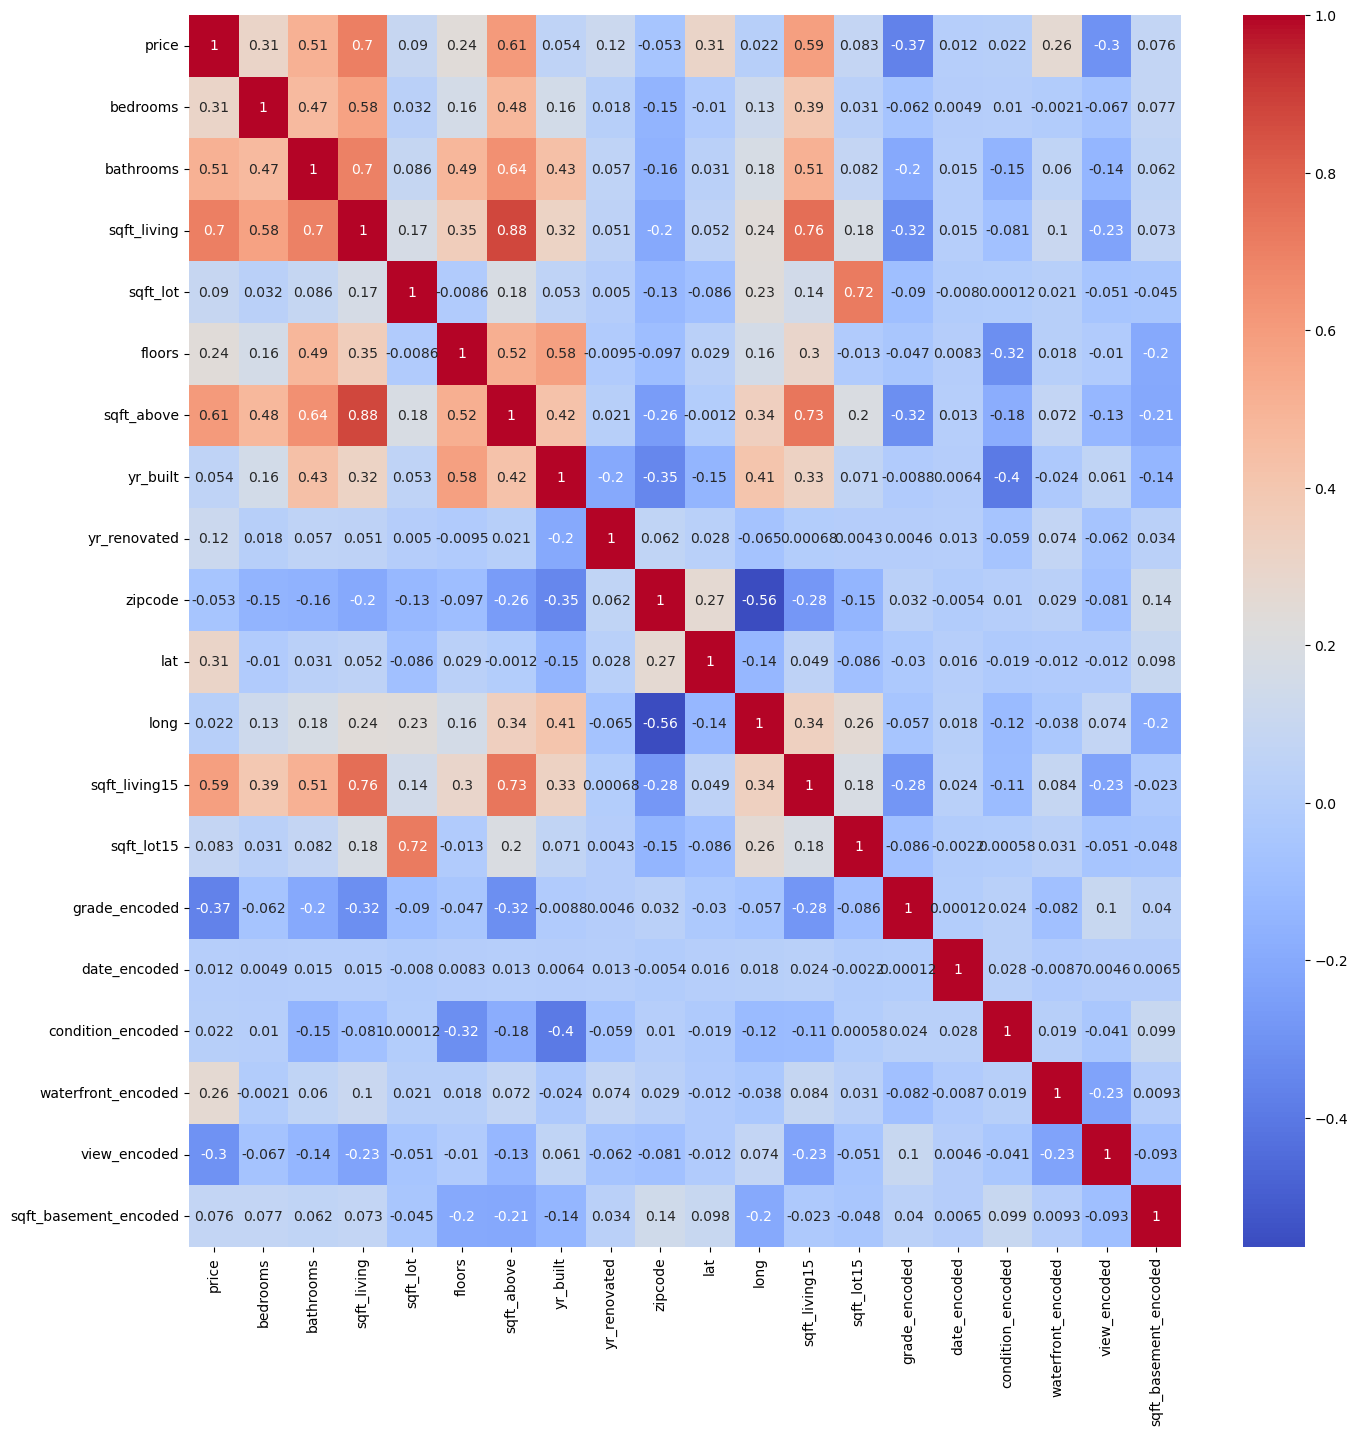

In [19]:
# Plot a heatmap to visualize correlation of features
fig, heat = plt.subplots(figsize = (16,16))
heat = sns.heatmap(df_new.corr(), annot = True, cmap = 'coolwarm')

The resulting p_values variable will contain the p-values for each feature in the model. 
These p-values represent the probability of observing the data if the null hypothesis 
(the coefficient is equal to zero) is true. 
Lower p-values indicate more significant predictors. 
You can interpret these values to assess the significance of each feature in predicting the target variable. Features with p-values below a chosen significance level (e.g., 0.05) are typically considered statistically significant.

This will sort the p-values in descending order, allowing you to see which features have the highest p-values (i.e., least statistically significant) first.

In [29]:
# Separate the target variable (price) and predictors (features)
X = df_new[['sqft_living', 'bedrooms', 'bathrooms', 'sqft_above','sqft_basement_encoded','yr_built','yr_renovated',
            'zipcode','floors','lat','long','sqft_lot','sqft_living15','condition_encoded', 'date_encoded',
            'view_encoded', 'grade_encoded', 'waterfront_encoded']]
y = df_new['price']

# Add a constant term to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the p-values
p_values = model.pvalues

# Sort the p-values in descending order
p_values_sorted = p_values.sort_values(ascending=False)

# Print the p-values
p_values_sorted

date_encoded              4.712976e-01
sqft_basement_encoded     4.339594e-01
sqft_lot                  3.246421e-01
const                     3.209099e-02
sqft_above                1.330087e-12
floors                    3.507341e-15
yr_renovated              4.972538e-21
condition_encoded         2.197856e-39
zipcode                   2.310051e-73
bathrooms                 7.551786e-74
view_encoded              3.079394e-85
bedrooms                  4.087736e-89
sqft_living15             8.516585e-91
yr_built                 1.069274e-112
long                     2.547273e-121
grade_encoded            2.869466e-163
sqft_living               0.000000e+00
lat                       0.000000e+00
waterfront_encoded        0.000000e+00
dtype: float64

# LINEAR REGRESSION ANALYSIS
Before performing a linear regression analysis, it's a best practice to look at a scatter plot of the independent variable vs. the dependent variable. Linear regression is only appropriate if there is a linear relationship between them. 



In statistical modeling, the goal is typically to build a model that accurately predicts the target variable (dependent variable) based on the independent variables (features). Therefore, it's generally more important for the independent variables to have a relationship with the target variable rather than with each other.
Here's why:Predictive Power: The primary purpose of build

# visualizing target and independent variables correlations
In summary, in linear regression modeling,the primary focus is on selecting independent variables
that have a strong relationship with the target variable and contribute to explaining
the variation in the target variable. While some correlation between independent variables is acceptable,
it's generally more important for the independent variables to have a relationship with the target variable
than with each other.

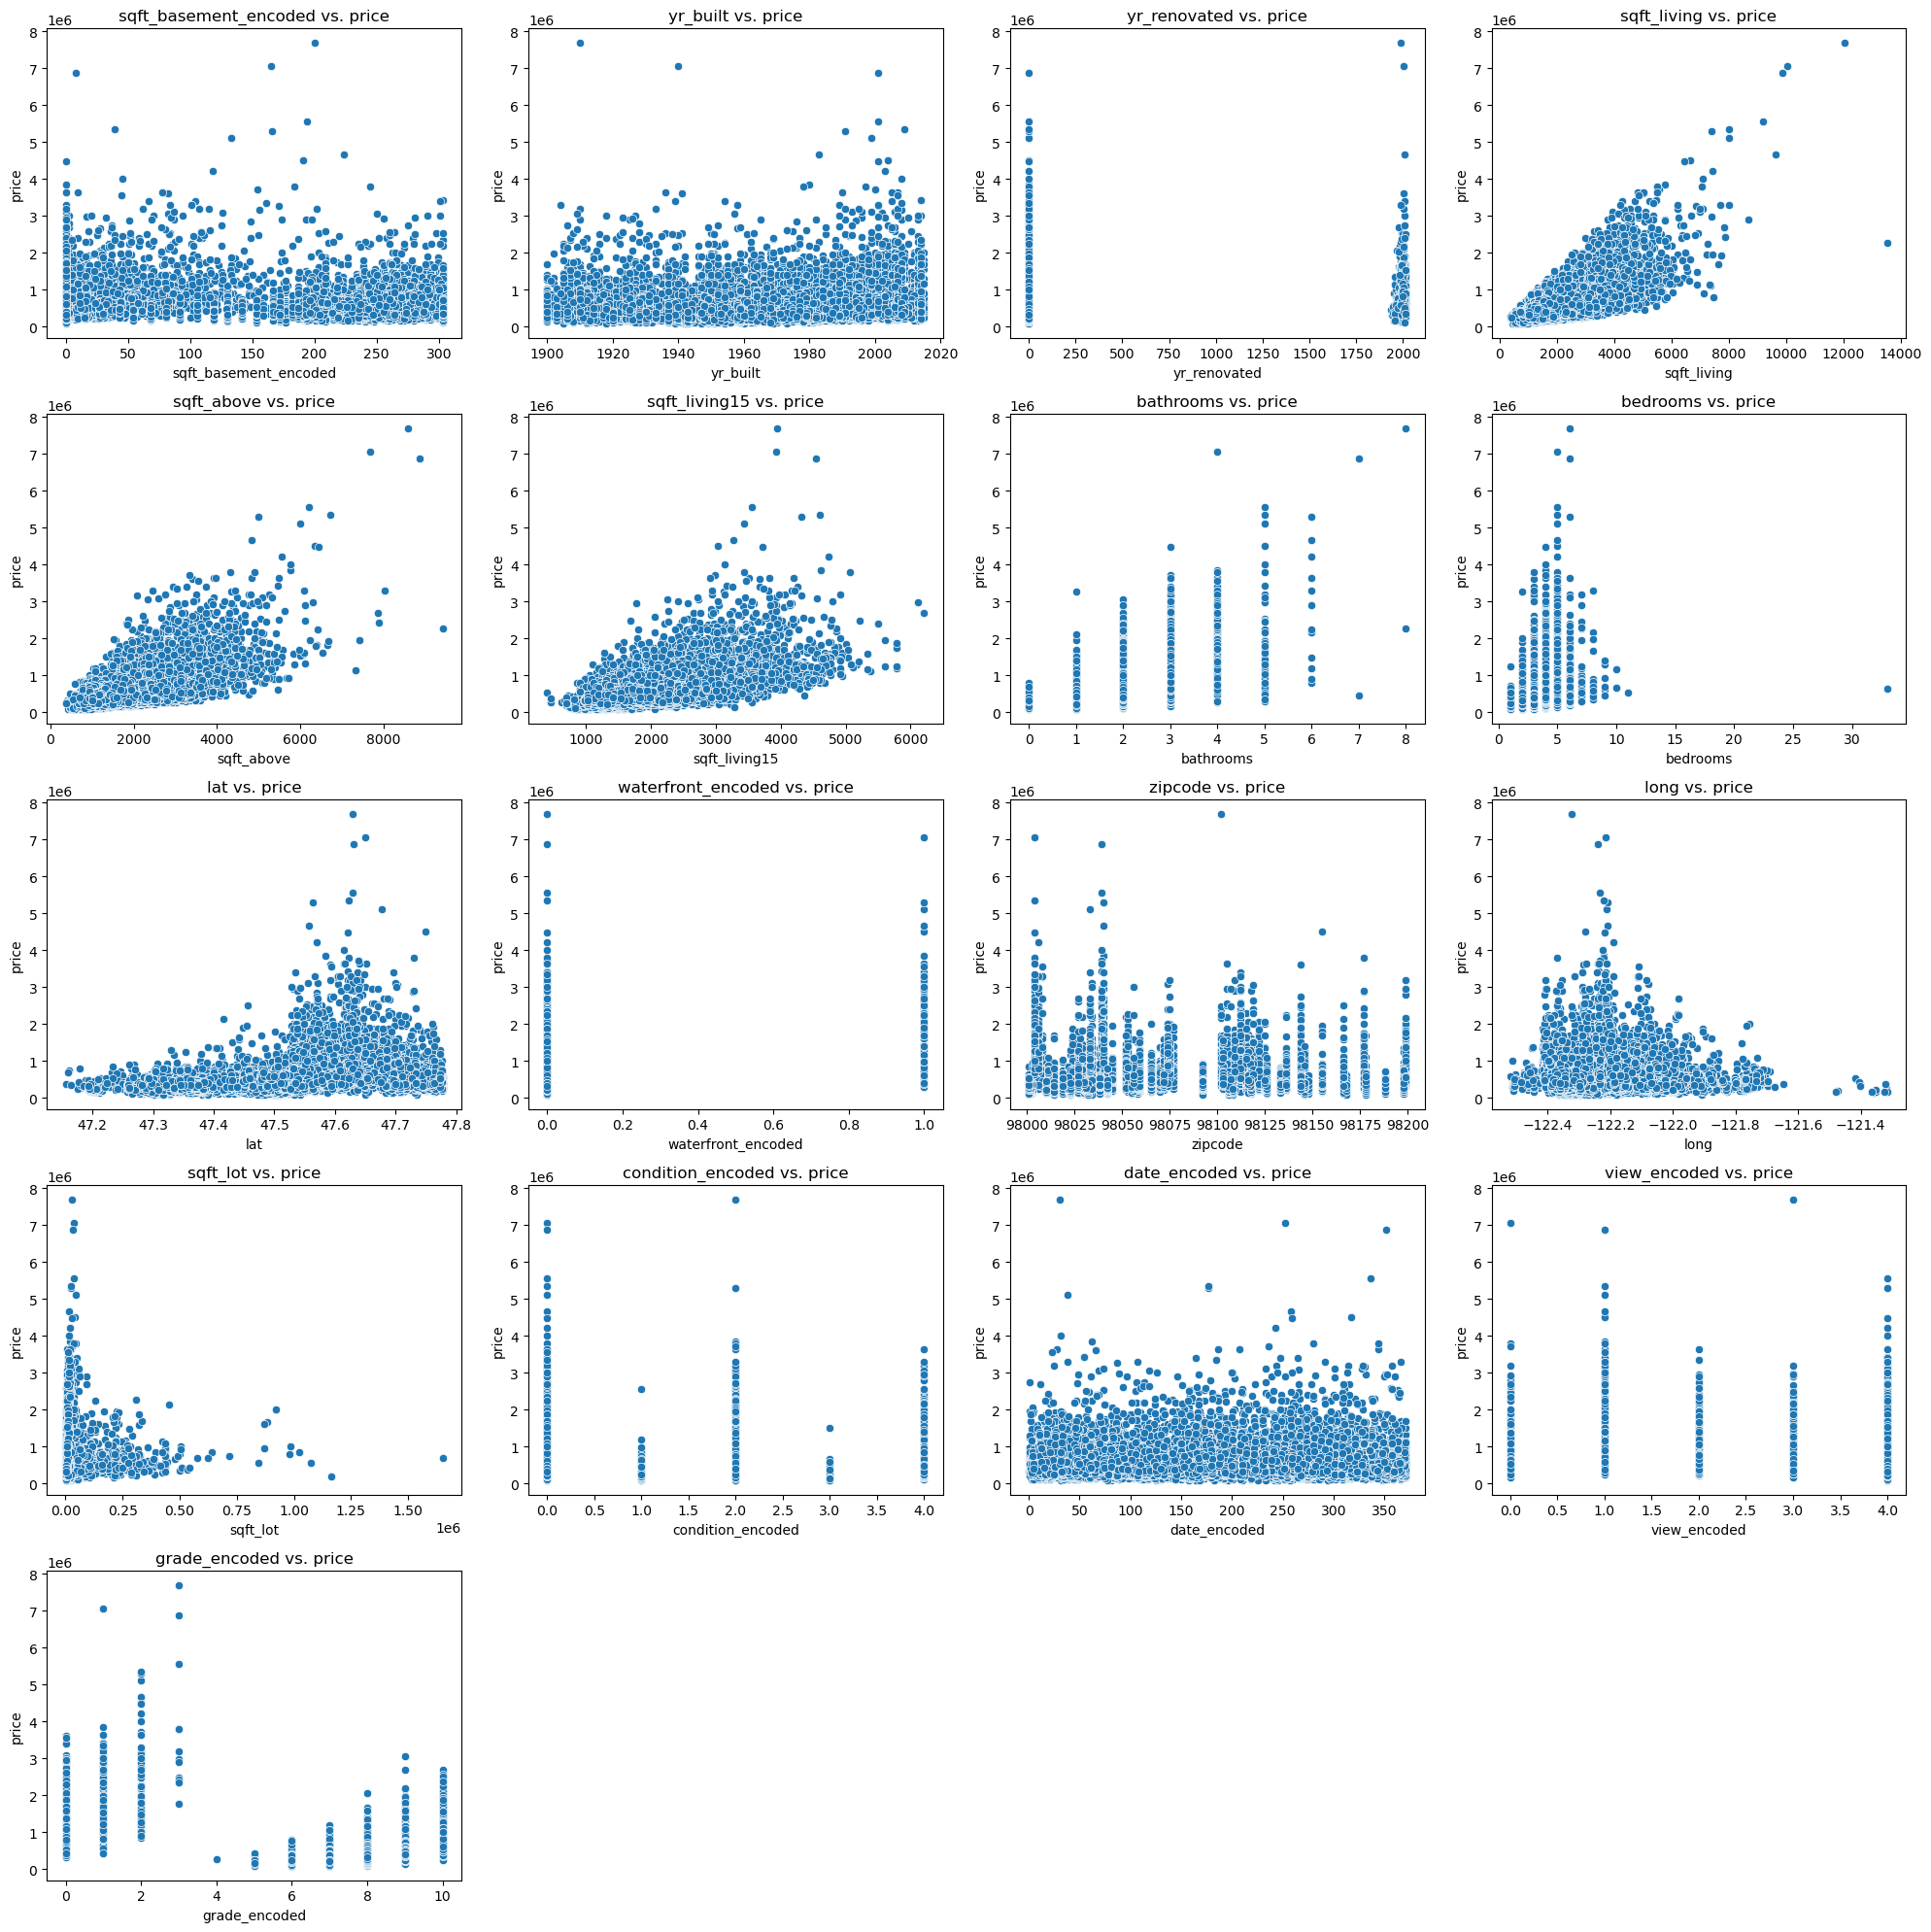

In [61]:
#plotting a scatter plot between the target variables and the independent variables
plt.figure(figsize=(20, 20))
for i, column in enumerate(['sqft_basement_encoded','yr_built','yr_renovated',
                            'sqft_living','sqft_above','sqft_living15','bathrooms',
                            'bedrooms','lat','waterfront_encoded', 
                            'zipcode','long','sqft_lot','condition_encoded', 
                            'date_encoded','view_encoded', 'grade_encoded']):
    plt.subplot(5, 4, i+1)  # Adjusted to 5x4 grid for 17 subplots
    sns.scatterplot(data=df_new, x=column, y='price')
    plt.title(f'{column} vs. price')
plt.tight_layout()
plt.show()


# ASSUMPTIONS OF LINEAR REGRESSION

# 1.LINEARITY

With this modification, each subplot will display a scatterplot with a regression line fitted to the data.
The regression line represents the line of best fit, indicating the relationship between each independent variable 
and the target variable 'price'. Adjust the figsize and subplot parameters as needed for a better visualization.




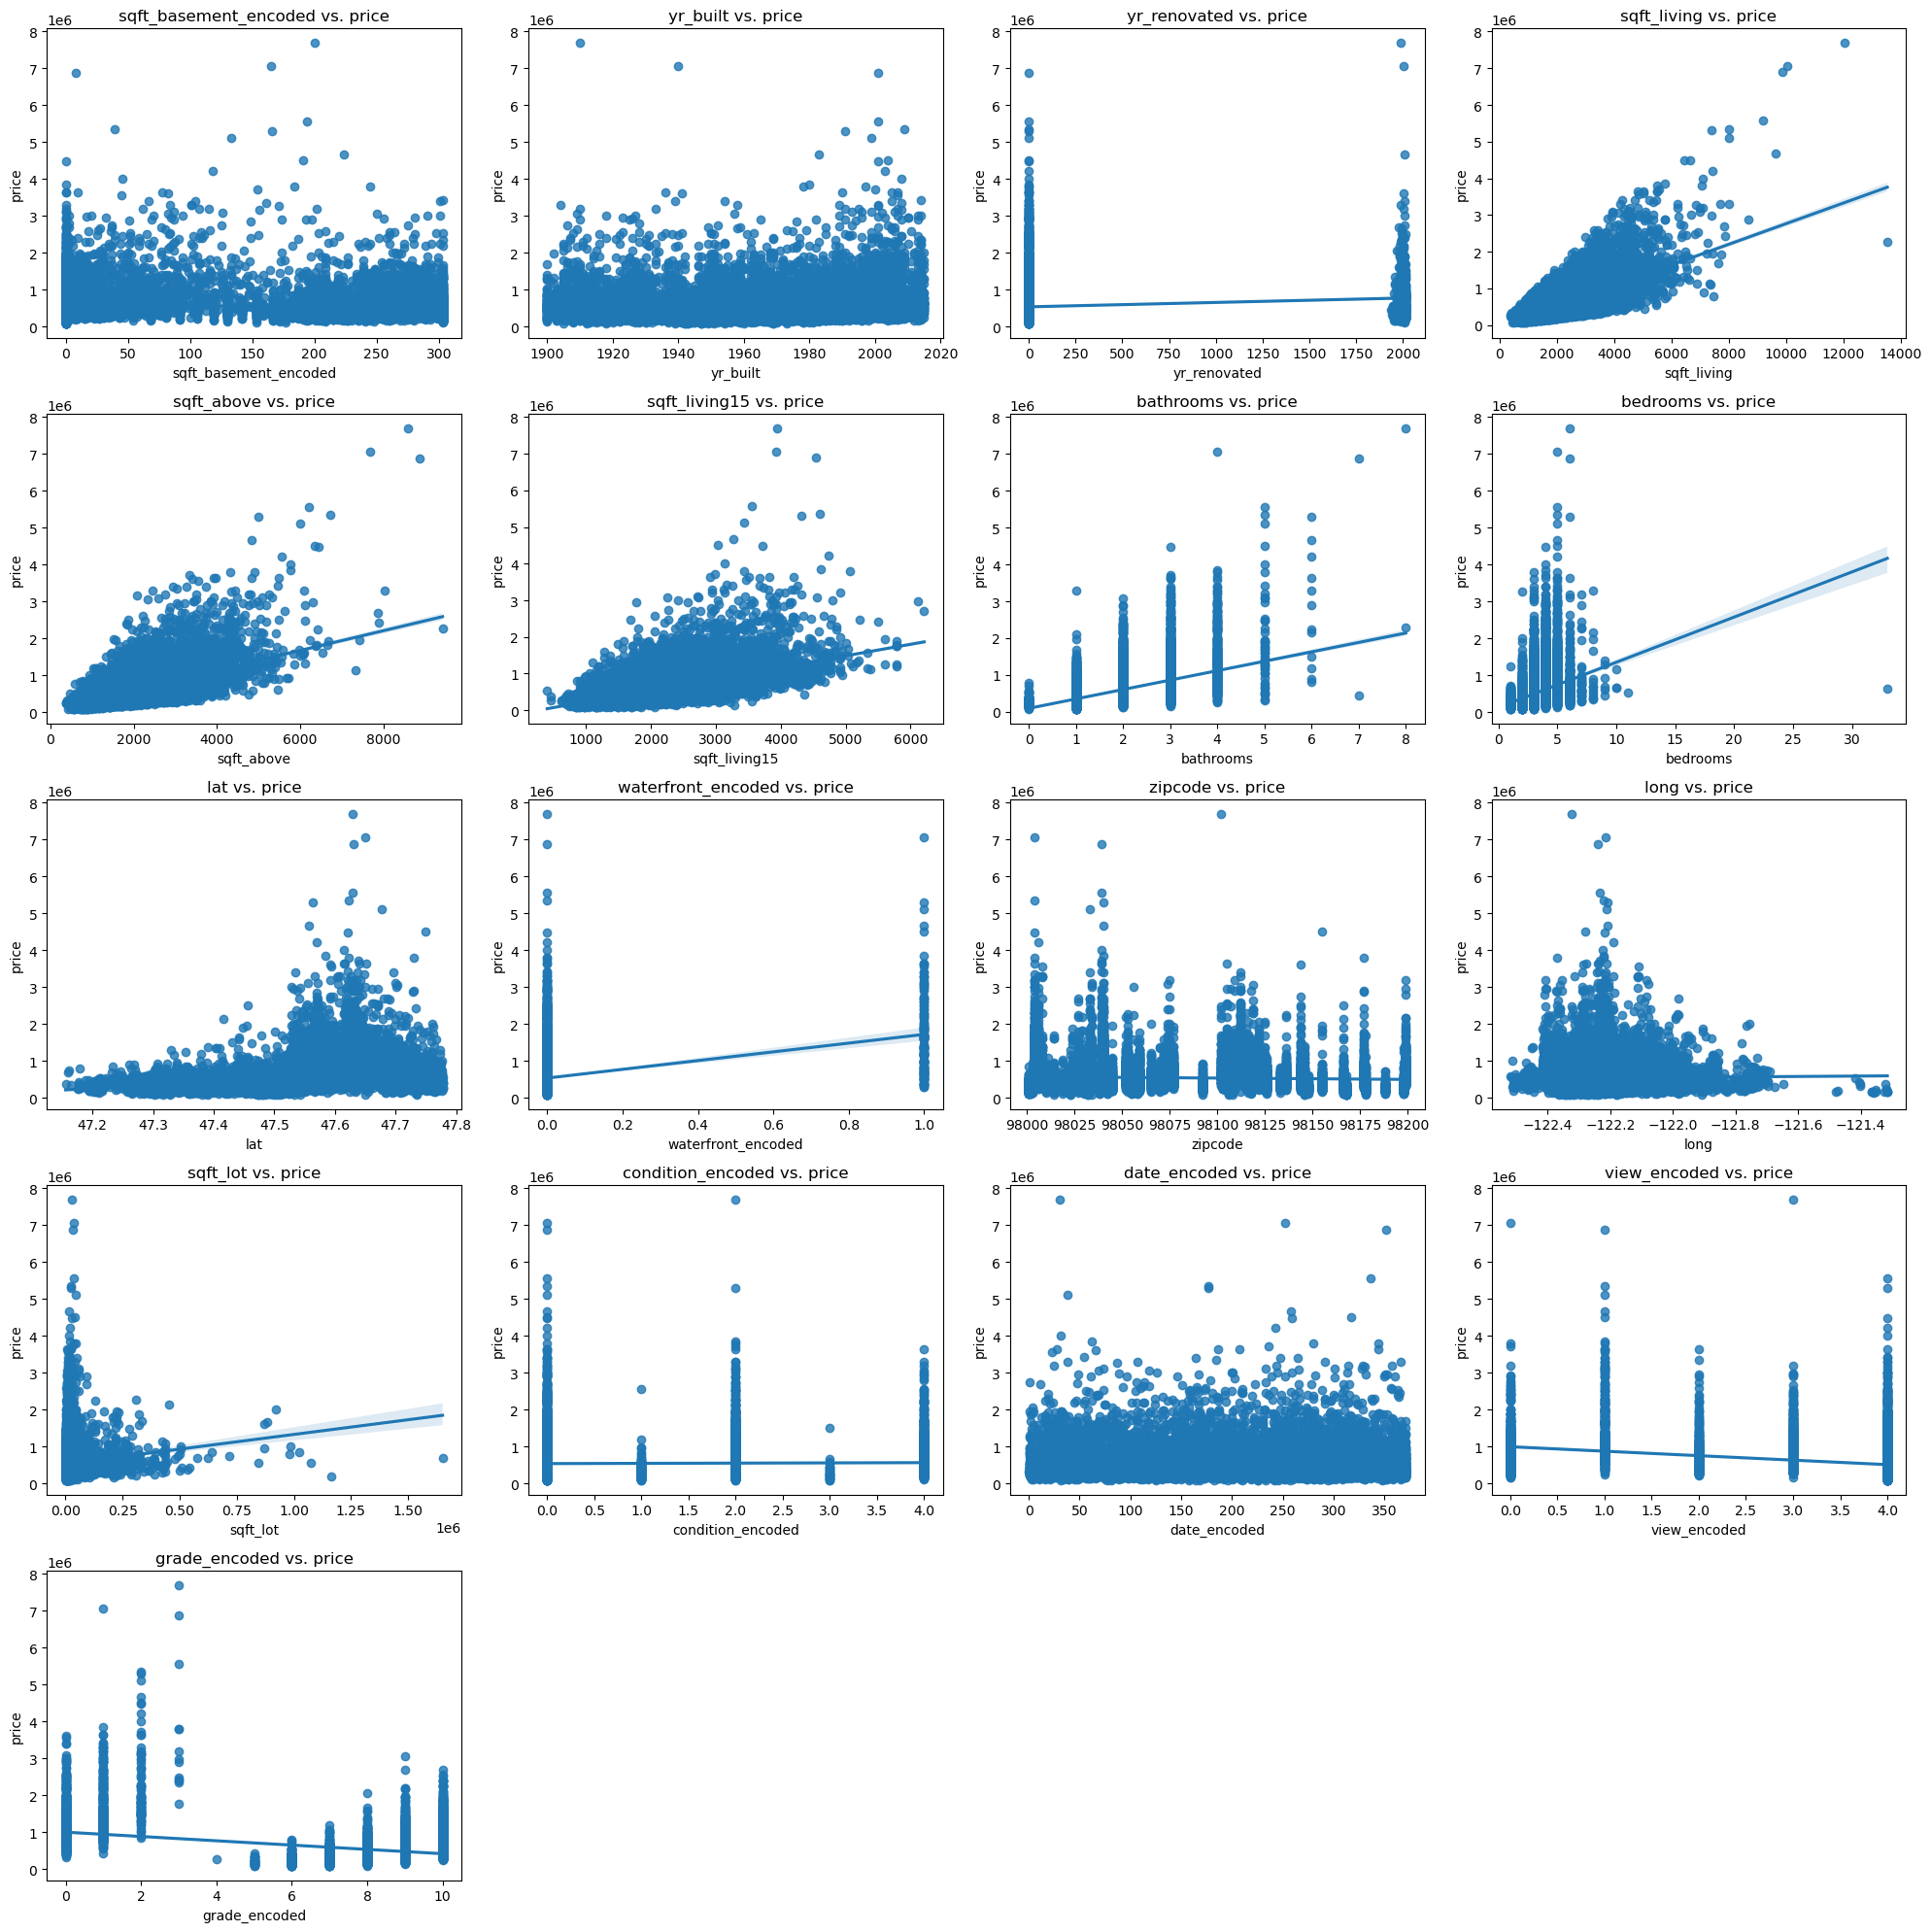

In [64]:
# Draw line of best fit to establish the linear relationship
plt.figure(figsize=(20, 20))
for i, column in enumerate(['sqft_basement_encoded','yr_built','yr_renovated',
                            'sqft_living','sqft_above','sqft_living15','bathrooms',
                            'bedrooms','lat','waterfront_encoded', 
                            'zipcode','long','sqft_lot','condition_encoded', 
                            'date_encoded','view_encoded', 'grade_encoded']):
    plt.subplot(5, 4, i+1)  # Adjusted to 5x4 grid for 17 subplots
    sns.regplot(data=df_new, x=column, y='price')
    plt.title(f'{column} vs. price')
plt.tight_layout()
plt.show()


In [91]:
# Calculate Pearson correlation coefficients
correlation_coeffs = df_new.corr()['price']

# Sort correlation coefficients in descending order
correlation_coeffs_sorted = correlation_coeffs.sort_values(ascending=False)

# Print correlation coefficients in descending order
print("Pearson correlation coefficients (descending order):")
print(correlation_coeffs_sorted)


Pearson correlation coefficients (descending order):
price                    1.000000
sqft_living              0.701917
sqft_above               0.605368
sqft_living15            0.585241
bathrooms                0.510631
bedrooms                 0.308787
lat                      0.306692
waterfront_encoded       0.264306
floors                   0.237264
yr_renovated             0.117855
sqft_lot                 0.089876
sqft_lot15               0.082845
sqft_basement_encoded    0.075768
yr_built                 0.053953
condition_encoded        0.022246
long                     0.022036
date_encoded             0.011694
zipcode                 -0.053402
view_encoded            -0.304727
grade_encoded           -0.366458
Name: price, dtype: float64


# conclusions
There is a positive linear correlation relationship between price and sqft_living,sqft_above,sqft_living15,bathrooms.
There is a negative linear correlation relationship between price and grade_encoded,view encoded,zipcode.
There is a weak linear correlation relationship between price and independent variables long,condition_encoded,yr_built,sqft_basement encoded,sqft_lot15,sqft_lot,yr_renovated,floors,waterfront_encoded,lat,bedrooms.


# recommendations
Droping the independent variables since as they violate the linierity assumption.

# 2.INDEPENDENCE

To explore the independence assumption in linear regression,
we typically examine the residuals of the model.
The residuals represent the difference between the observed values of the target variable
and the values predicted by the model. The independence assumption states that 
the residuals should be independent of each other.

In the residual plot, if you observe a pattern (such as curvature, funnel shape, or any systematic trend)
or heteroscedasticity (changing spread of residuals with respect to the fitted values), 
it may indicate a violation of the independence assumption. 
Additionally, the Durbin-Watson test can provide a statistical assessment of autocorrelation in the residuals. 
If the Durbin-Watson statistic is significantly different from 2,
it suggests a violation of the independence assumption.

In [82]:
# Fit the linear regression model
X = df_new[['sqft_basement_encoded','yr_built','yr_renovated',
            'sqft_living','sqft_above','floors','sqft_living15','bathrooms',
            'bedrooms','lat','waterfront_encoded', 
            'zipcode','long','sqft_lot','condition_encoded', 
            'date_encoded','view_encoded', 'grade_encoded']]
y = df_new['price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Get the residuals
residuals = model.resid

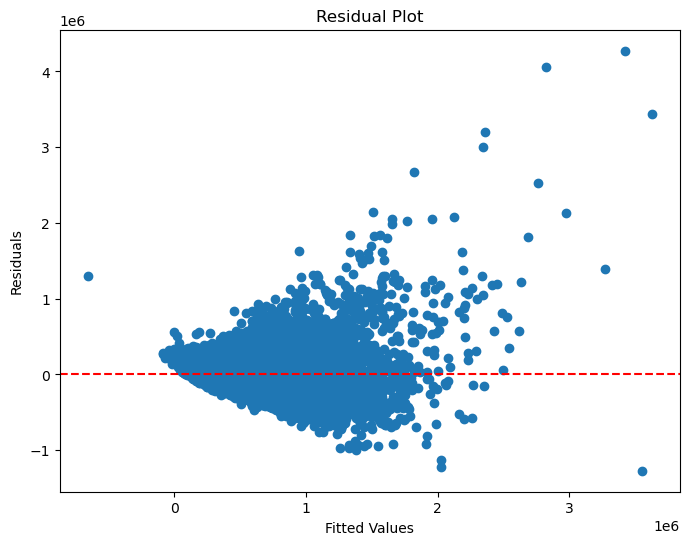

Durbin-Watson Test Statistic: 1.9942088759532504


In [83]:
# plot a Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Durbin-Watson test
durbin_watson_statistic = sm.stats.stattools.durbin_watson(residuals)
print("Durbin-Watson Test Statistic:", durbin_watson_statistic)


# Conclusions
The above test statistic of approximately 1.99 indicates that there is very little evidence of autocorrelation in the residuals. This suggests that the independence assumption in linear regression may be reasonable for the model.
Therefore Providing evidence that the independence assumption in linear regression is not violated, 
indicating that the model's residuals exhibit no significant autocorrelation pattern.

# 3.Homoscedasticity

In [ ]:
To explore the assumption of homoscedasticity (constant variance of residuals) in linear regression,
you can create a plot of the residuals against the predicted values. 
The plot should show no clear pattern or trend in the spread of residuals as the predicted values change.
Here's how you can create such a plot:

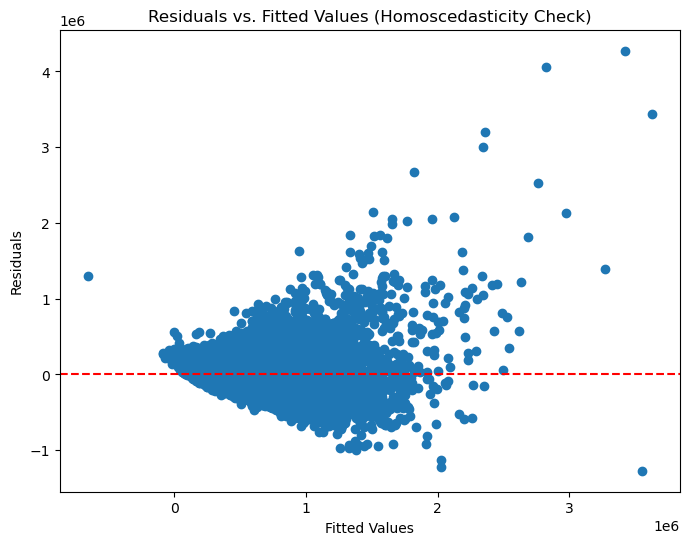

In [84]:
# Plot residuals vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values (Homoscedasticity Check)')
plt.show()


# conclusion
The observed pattern is a Cone_Shaped or the spread of residuals increases 
or decreases systematically as the predicted values change.This indicates heteroscedasticity, violating the assumption of constant variance homoscedasticity

# 4. Normality

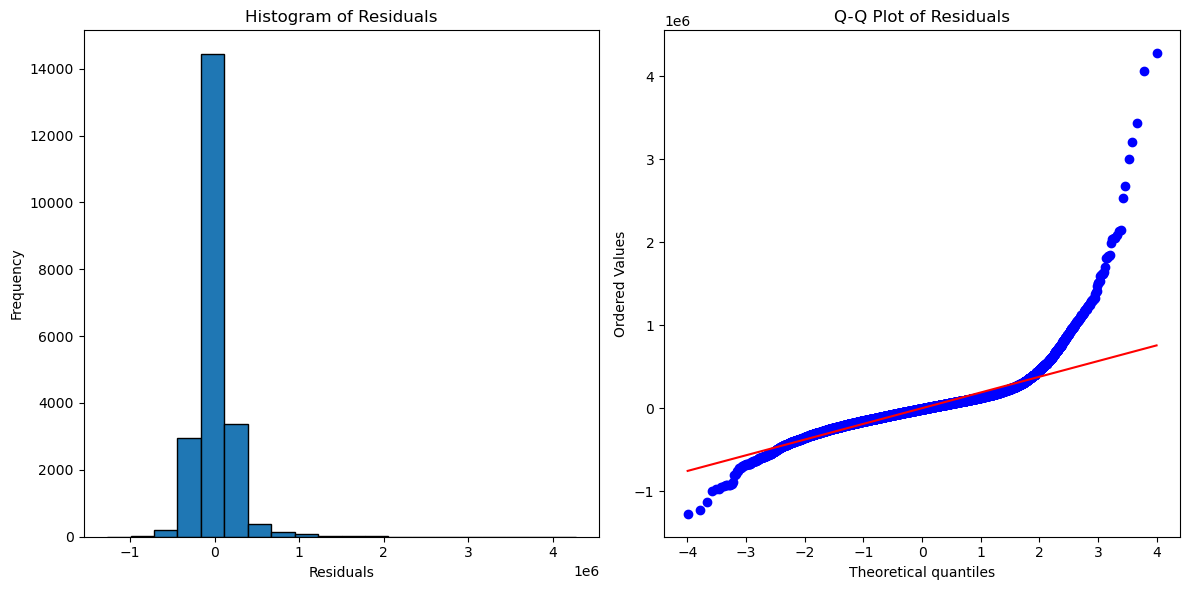

In [85]:
# Create subplots for histogram and Q-Q plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram of residuals
axes[0].hist(residuals, bins=20, edgecolor='black')
axes[0].set(title='Histogram of Residuals', xlabel='Residuals', ylabel='Frequency')

# Q-Q plot of residuals
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()


# conclusion
Histogram appears Normal but has some potential outliers.The Q-Qplot is also not heavily skewed.

In [104]:
# Function to identify outliers using IQR method
def identify_outliers(data, threshold=1.5):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers


# conclusion
Each row represents a data point in the df_new dataset.
Each column represents a feature.
If a value in a particular column is True, it means that the corresponding data point is considered an outlier for that feature.
If a value in a particular column is False, it means that the corresponding data point is not considered an outlier for that feature.

Zipcode and sqft_lot rows have outliers.

# Recommendation
Apply log transformation, the selected features will have a more normalized distribution, which can help mitigate the impact of outliers and improve the performance of certain statistical analyses or machine learning models.

# MODELLING

# 1. Base model: Simple Linear Regression Model

In [86]:
1.# Define the formula for the simple linear regression model

simple_formula = 'price ~ sqft_living'

# Fit the linear regression model
simple_model = smf.ols(formula=simple_formula, data=df).fit()

# Generate and display the summary of the linear regression model
simple_model_summary = simple_model.summary()

print(simple_model_summary)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 04 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:05:01   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      

# Conclusions
The R-squared value of approximately 0.493 indicates that the model explains around 49.3% of the variance in the target variable (house prices). This means that the independent variable 'sqft_living' accounts for about 49.3% of the variability observed in house prices.

The adjusted R-squared value is also approximately 0.493, which is the same as the R-squared value. This suggests that there is no penalty for the inclusion of additional predictors in the model.

The coefficient for 'sqft_living' is 280.8630, which means that, on average, each additional square foot of living space is associated with an increase in house price of approximately $280.86.

The p-value associated with the coefficient of 'sqft_living' (P>|t|) is close to zero (0.000), indicating that the coefficient is statistically significant. This suggests that the square footage of living space has a significant impact on house prices.

The F-statistic (2.097e+04) and its associated p-value (Prob (F-statistic): 0.00) indicate that the overall model is statistically significant. A small p-value for the F-statistic suggests that the model as a whole is statistically significant.



# Recommendations
Overall, the model with only 'sqft_living' as the predictor variable explains a significant portion of the variance in house prices, but there may be issues with the residuals not meeting the assumptions of normality and potential multicollinearity. 

Further diagnostic checks and potentially model refinement may be warranted to address these issues.

We can do that by Multiple linear regression model.

# 2. Multiple Linear Regression Model

In [87]:
# Define the formula for the multiple regression model
multiple_formula = 'price ~ sqft_living + sqft_basement_encoded +floors + yr_built + yr_renovated + sqft_above + sqft_living15 + bathrooms + bedrooms + lat + waterfront_encoded + zipcode + long + sqft_lot + condition_encoded + date_encoded + view_encoded + grade_encoded'

# Fit the multiple regression model
multiple_model = ols(multiple_formula, df_new).fit()

# Generate and display the summary of the multiple regression model
multiple_model_summary = multiple_model.summary()

# Print the summary
print(multiple_model_summary)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     2528.
Date:                Thu, 04 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:05:08   Log-Likelihood:            -2.9514e+05
No. Observations:               21597   AIC:                         5.903e+05
Df Residuals:                   21578   BIC:                         5.905e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -6.488e+

# Conclusions
The R-squared value of approximately 0.677 indicates that the model explains around 67.7% of the variance in the target variable (house prices). This means that the independent variables included in the model collectively account for about 67.7% of the variability observed in house prices.

Each coefficient represents the change in the target variable (price) associated with a one-unit change in the respective independent variable, holding other variables constant.
For example, the coefficient for 'sqft_living' is 180.5924, which means that, on average, each additional square foot of living space is associated with an increase in house price of approximately $180.59.
Similarly, coefficients for other variables indicate their impact on house prices.

Coefficients with p-values less than the chosen significance level (e.g., 0.05) are considered statistically significant. In this case, many coefficients have p-values close to zero, indicating statistical significance.

The Durbin-Watson statistic (1.994) is close to 2, indicating no significant autocorrelation in the residuals.

The Omnibus test and Jarque-Bera test results suggest that the residuals may not be normally distributed, as indicated by the high skewness and kurtosis values.

The presence of strong multicollinearity or other numerical problems is indicated by the large condition number.


# Recommendation
Overall, while the model explains a substantial portion of the variance in house prices, there may be some issues with the residuals not meeting the assumptions of normality and potential multicollinearity. Further diagnostic checks and potentially model refinement may be warranted to address these issues.

# 3. Random Forest Regression Model

In [102]:
#Random forest reggression model
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 16166414040.116522
R-squared: 0.8758495172336562


# Conclusions
In this case, the MSE of approximately 16,135,237,730.47 suggests that, on average, the squared difference between the actual and predicted values of the target variable (presumably house prices) is quite large.
In this case, the R-squared value of approximately 0.876 suggests that the model explains approximately 87.6% of the variance in the target variable.

The model has a relatively high R-squared value, indicating that it explains a significant portion of the variance in the target variable.
However, the high MSE suggests that there is still a considerable amount of error in the predictions made by the model. This could be due to several factors, such as unmodeled nonlinear relationships, outliers, or insufficient features capturing the complexity of the data.

# Recommendations
To further improve the model, we may consider:

Exploring additional features that could better capture the underlying relationships in the data.
Addressing outliers or anomalies in the data that could be contributing to large errors.
Trying different algorithms or techniques that may better handle the characteristics of the data.
Performing more advanced feature engineering or transformation to better represent the underlying patterns in the data.

Random forest Model is a better model to use in referrence to our objective to predict factors to consider while doing house rennovations to increase income in refrence to its high R_Squared Value.
However,The MSE can potentially cause errors to our model.Therefore,further analysis, model training and testing and addressing some issues might potentially increase our model performance and lowering the MSE.